# Assignment 3: DBSCAN

## 1. Data Analysis and Preparation

## 1.1 Load and Summarize Data
- Load required libraries
- Load `patient_priority.csv` into a pandas DataFrame.
- Drop "triage" column and print the header using `DataFrame.head()`.
- Print a summary using `DataFrame.describe()`.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = "https://raw.githubusercontent.com/Hunteracademic/Unsupervised_assignment_1/master/patient_priority.csv"
patient_priority_raw = pd.read_csv(url)
patient_priority = patient_priority_raw.drop("triage", axis=1)
patient_priority.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


In [7]:
patient_priority.describe()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.000000,6962.000000,6961.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000
mean,2011.954180,57.450014,0.531964,0.529015,109.629991,184.711290,163.502442,0.061764,98.394283,56.813416,111.091640,27.190908,0.467386,0.071531,0.039500
std,1560.966466,11.904948,0.499013,1.253791,21.534852,32.010359,15.458693,0.240743,28.598084,22.889316,17.470033,7.362886,0.102663,0.257729,0.194796
min,0.000000,28.000000,0.000000,0.000000,60.000000,150.000000,138.000000,0.000000,55.120000,21.000000,81.000000,10.300000,0.078000,0.000000,0.000000
25%,604.000000,48.000000,0.000000,0.000000,92.000000,164.000000,150.000000,0.000000,78.707500,36.000000,97.000000,21.800000,0.467386,0.000000,0.000000
50%,1628.500000,56.000000,1.000000,0.000000,111.000000,179.000000,163.000000,0.000000,93.000000,55.000000,111.000000,26.200000,0.467386,0.000000,0.000000
75%,3368.750000,66.000000,1.000000,0.000000,127.000000,192.000000,177.000000,0.000000,111.632500,77.000000,125.000000,31.000000,0.467386,0.000000,0.000000
max,5109.000000,82.000000,1.000000,4.000000,165.000000,294.000000,202.000000,1.000000,199.000000,99.000000,171.000000,66.800000,2.420000,1.000000,1.000000


**Use `DataFrame.describe()` to summarize the dataset.**

- There are 15 different columns with numerical data that descriptive statistics can use. 
- Notable there are 6962 different records in this dataset that represent each row. 


**Explain the meaning of each column.**


- **Unnamed: 0**: This looks like an index column identifying unique patients (however it seems there may be duplicates)
- **age**: Patient age in years
- **gender**: Recorded sex at birth
- **chest pain type**: Encoded category of chest pain (e.g., typical/atypical/none, represented as 1–4
- **blood pressure**: Resting blood pressure
- **cholesterol**: Serum cholesterol level
- **max heart rate**: Maximum heart rate achieved during testing
- **exercise angina**: Presence of exercise‑induced angina (0 = no, 1 = yes)
- **plasma glucose**: Plasma glucose concentration
- **skin_thickness**: Triceps skinfold thickness in mm
- **insulin**: Serum insulin level
- **bmi**:  Body mass index
- **diabetes_pedigree**: Diabetes pedigree function (family diabetes history metric)
- **hypertension**: Indicator for high blood pressure (0 = no, 1 = yes)
- **heart_disease**: Indicator for diagnosed heart disease (0 = no, 1 = yes)
- **Residence_type**: Patient residence type
- **smoking_status**: Smoking status history

**Make observations based on the summary statistics.**

- The ages in this group go from the early 30s all the way to over 80, but most people are in their 50s to 70s. This makes sense since you'd usually see older people in a heart or diabetes clinic

- Even though some people have high blood pressure or lipids, the "hypertension" and "heart disease" labels are often marked as 0. This could mean they haven't been officially diagnosed yet or they are just in for a screening

- The data shows people living in both Urban and Rural areas, so we can compare if where they live changes their health


## Cleaning

In [8]:
patient_priority.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6962 non-null   int64  
 1   age                6962 non-null   float64
 2   gender             6961 non-null   float64
 3   chest pain type    6962 non-null   float64
 4   blood pressure     6962 non-null   float64
 5   cholesterol        6962 non-null   float64
 6   max heart rate     6962 non-null   float64
 7   exercise angina    6962 non-null   float64
 8   plasma glucose     6962 non-null   float64
 9   skin_thickness     6962 non-null   float64
 10  insulin            6962 non-null   float64
 11  bmi                6962 non-null   float64
 12  diabetes_pedigree  6962 non-null   float64
 13  hypertension       6962 non-null   float64
 14  heart_disease      6962 non-null   float64
 15  Residence_type     6962 non-null   object 
 16  smoking_status     6962 

In [9]:
print("--- Duplicate Row Report ---")
print(f"Duplicates found: {patient_priority.duplicated().sum()}")

print("-" * 30) # Prints a line of 30 dashes

print("--- Missing Value Report ---")
print(patient_priority.isna().sum()[patient_priority.isna().sum() > 0])

--- Duplicate Row Report ---
Duplicates found: 0
------------------------------
--- Missing Value Report ---
gender    1
dtype: int64


In [17]:
patient_priority_clean = patient_priority.dropna()

In [20]:
dup_rows_col = patient_priority_clean[patient_priority_clean.duplicated(subset=["Unnamed: 0"], keep=False)]
dups_col = patient_priority_clean[
    patient_priority_clean.duplicated(subset=["Unnamed: 0"], keep=False)
].sort_values(by=["Unnamed: 0"])

print(dups_col)

      Unnamed: 0   age  gender  chest pain type  blood pressure  cholesterol  \
2              2  37.0     1.0              2.0           130.0        294.0   
1854           2  80.0     1.0              0.0           128.0        179.0   
1855           3  49.0     0.0              0.0            80.0        199.0   
3              3  48.0     0.0              4.0           138.0        214.0   
1139           3  50.0     1.0              0.0            66.0        195.0   
...          ...   ...     ...              ...             ...          ...   
3039        1187  43.0     1.0              0.0           129.0        171.0   
3040        1188  62.0     1.0              0.0           128.0        189.0   
1137        1188  57.0     0.0              2.0           130.0        236.0   
1138        1189  38.0     1.0              3.0           138.0        175.0   
3041        1189  73.0     1.0              0.0           121.0        184.0   

      max heart rate  exercise angina  

### Conclusion:

- Due to only having one row with missing data we decided to drop it as our current dataset still has 6961 to analyze which is plenty

- After inspecting the "Unnamed" 0" column it seems like the values in it are not primary keys/unique identifiers. Due to no available context on that column or any obvious pattern to follow we decided to drop it

In [21]:
patient_priority_clean.drop(columns=["Unnamed: 0"], inplace=True)
patient_priority_clean.head()

C:\Users\gly3\AppData\Local\Temp\ipykernel_14500\2128965378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_priority_clean.drop(columns=["Unnamed: 0"], inplace=True)


,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


### Encoding

In [24]:
patient_priority_enc = pd.get_dummies(
    patient_priority_clean,
    columns=["Residence_type", "smoking_status"],
    drop_first=True,
    dtype=int
)
patient_priority_enc.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,1,0,1,0
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,1,0,1,0
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,1,0,1,0
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,1,0,1,0
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,1,0,1,0


### Visualization

#### Heatmap

Text(0.5, 1.0, 'Correlation Heatmap of Patient Priority Data')

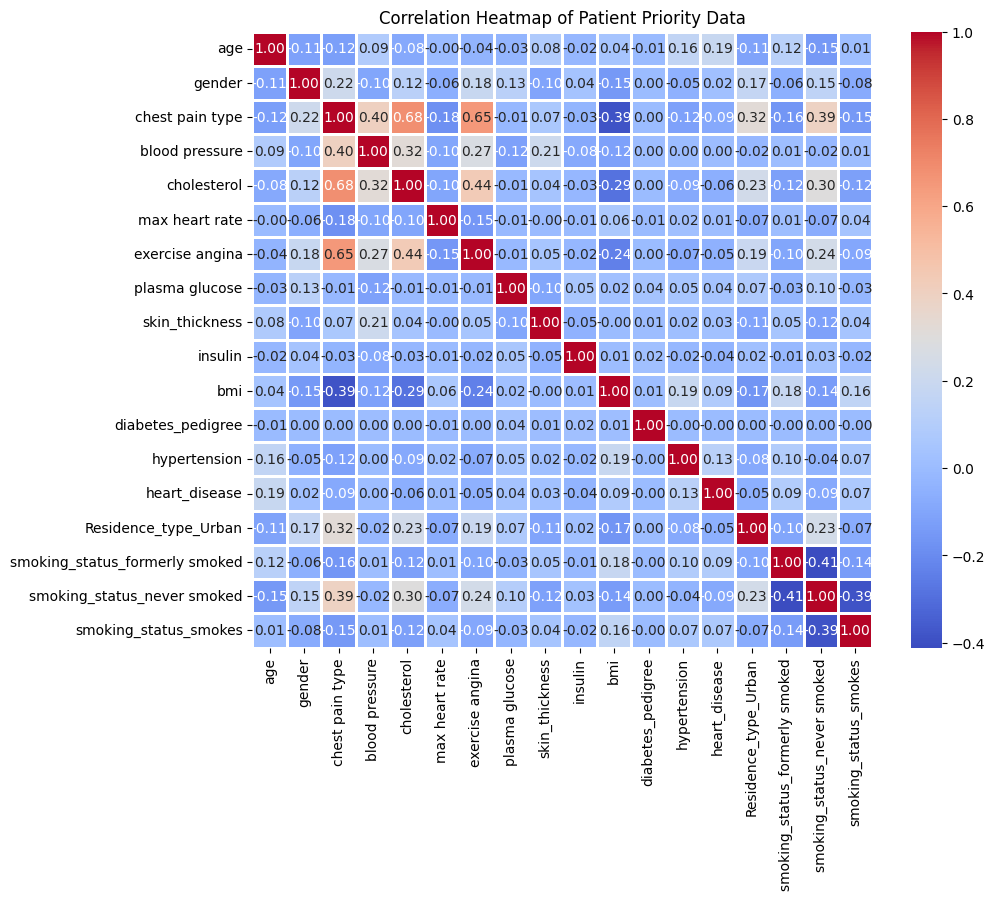

In [25]:
corr = patient_priority_enc.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=1
)
plt.title("Correlation Heatmap of Patient Priority Data")

#### Pairplots

In [ ]:
sns.pairplot(patient_priority_enc)